In [5]:
import scanpy as sc,os,pickle,sys,copy
import scanpy.external as sce, scvelo as scv, pandas as pd

In [2]:
with open("./200608-FL-totalclustered.pk",'rb') as f:
    adata = pickle.load(f)

# update columns in .obs

In [3]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3',
       'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet',
       'pANN', 'pred.immgen.fine', 'pred.immgen.finepruned',
       'pred.immgen.main', 'pred.immgen.mainpruned', 'RNA_snn_res.0.6',
       'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'S.Score',
       'G2M.Score', 'Phase', 'n_genes', 'S_score', 'G2M_score', 'phase',
       'leiden0.8', 'leiden0.7', 'leiden0.6', 'leiden0.5', 'leiden0.4',
       'leiden0.3', 'leiden0.2', 'leiden0.1', 'ann0409', 'ann0608'],
      dtype='object')

In [4]:
import dfply
adata.obs["ann0608"] = adata.obs["ann0608"].astype(str)
adata.obs.loc[adata.obs.ann0608=="αLP2(γδT)","ann0608"]="ILCP.1"
adata.obs.loc[adata.obs.ann0608=="ILCP","ann0608"]     ="ILCP.2"


adata.obs= adata.obs.drop(labels=['RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3',
'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6',
'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 
'leiden0.8', 'leiden0.7', 'leiden0.6',
'leiden0.5', 'leiden0.4', 'leiden0.3', 'leiden0.2', 'leiden0.1',
'n_genes','ann0409'],axis=1)

In [5]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'seurat_clusters', 'doublet', 'pANN', 'pred.immgen.fine',
       'pred.immgen.finepruned', 'pred.immgen.main', 'pred.immgen.mainpruned',
       'S.Score', 'G2M.Score', 'Phase', 'S_score', 'G2M_score', 'phase',
       'ann0608'],
      dtype='object')

In [6]:
adata

AnnData object with n_obs × n_vars = 4284 × 13730
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'doublet', 'pANN', 'pred.immgen.fine', 'pred.immgen.finepruned', 'pred.immgen.main', 'pred.immgen.mainpruned', 'S.Score', 'G2M.Score', 'Phase', 'S_score', 'G2M_score', 'phase', 'ann0608'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden0.1_colors', 'leiden0.2_colors', 'leiden0.3_colors', 'leiden0.4_colors', 'leiden0.5_colors', 'leiden0.6_colors', 'leiden0.7_colors', 'leiden0.8_colors', 'phase_colors', 'RNA_snn_res.0.1_colors', 'RNA_snn_res.0.3_colors', 'RNA_snn_res.0.5_colors', 'ann0409_colors', 'pred.immgen.mainpruned_colors', 'ann0409_deg', 'ann0409_degdf', 'dendrogram_ann0409', 'ann0608_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'normalized', 'scaled', 'counts_dca', 'normalized_dca', 'scaled_dca'

In [6]:
del adata.uns['log1p']
del adata.uns['leiden0.1_colors']
del adata.uns['leiden0.2_colors']
del adata.uns['leiden0.3_colors']
del adata.uns['leiden0.4_colors']
del adata.uns['leiden0.5_colors']
del adata.uns['leiden0.6_colors']
del adata.uns['leiden0.7_colors']
del adata.uns['leiden0.8_colors']
del adata.uns['ann0409_colors']
del adata.uns['ann0409_deg']
del adata.uns['ann0409_degdf']
del adata.uns['dendrogram_ann0409']
del adata.uns['RNA_snn_res.0.1_colors']
del adata.uns['RNA_snn_res.0.3_colors']
del adata.uns['RNA_snn_res.0.5_colors']

del adata.obs['seurat_clusters']
del adata.obs['doublet']
del adata.obs['pred.immgen.fine']
del adata.obs['pred.immgen.main']
del adata.obs['orig.ident']

del adata.uns['leiden']
del adata.obs['S.Score' ]
del adata.obs['G2M.Score']

adata.obs.nCount_RNA=adata.obs.nCount_RNA.astype(np.int32)
adata.obs.nFeature_RNA=adata.obs.nFeature_RNA.astype(np.int32)
adata.obs['percent.mt']=adata.obs['percent.mt'].astype(np.float32)
adata.obs.pANN=adata.obs.pANN.astype(np.float32)

In [9]:
adata

AnnData object with n_obs × n_vars = 4284 × 13730
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'pred.immgen.finepruned', 'pred.immgen.mainpruned', 'Phase', 'S_score', 'G2M_score', 'phase', 'ann0608'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'umap', 'phase_colors', 'pred.immgen.mainpruned_colors', 'ann0608_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'normalized', 'scaled', 'counts_dca', 'normalized_dca', 'scaled_dca'

In [10]:
adata= adata.copy()

/home/csj/anaconda3/envs/r411py37/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/home/csj/anaconda3/envs/r411py37/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [12]:
adata

AnnData object with n_obs × n_vars = 4284 × 13730
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'pred.immgen.finepruned', 'pred.immgen.mainpruned', 'Phase', 'S_score', 'G2M_score', 'phase', 'ann0608'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'umap', 'phase_colors', 'pred.immgen.mainpruned_colors', 'ann0608_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [15]:
adata.X = copy.copy(adata.layers['normalized'])

import numpy as np
from scipy.sparse import csc_matrix
adata.X = csc_matrix(adata.X, dtype=np.float32)


In [19]:
adata_imputed = sce.pp.magic(adata, name_list='all_genes', knn=5, n_jobs=20,n_pca=50, verbose=True, copy=True)


Calculating MAGIC...
  Running MAGIC on 4284 cells and 13730 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.98 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.03 seconds.
    Calculating affinities...
    Calculated affinities in 1.04 seconds.
  Calculated graph and diffusion operator in 6.06 seconds.
  Running MAGIC with `solver='exact'` on 13730-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 2.97 seconds.
Calculated MAGIC in 9.94 seconds.


In [20]:
adata.layers['normalized_magic']= copy.copy(adata_imputed.X.copy())

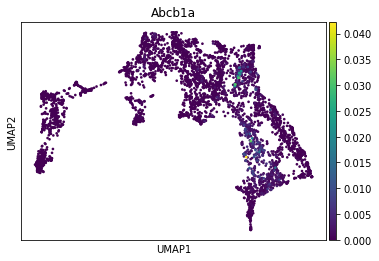

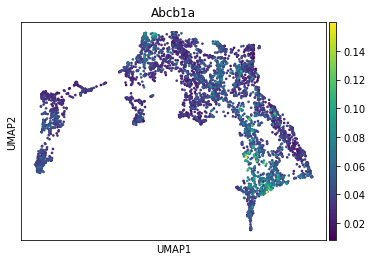

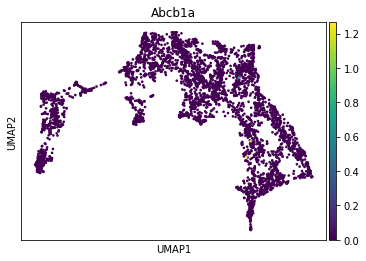

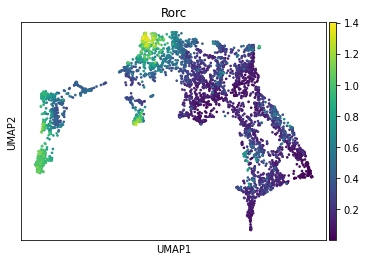

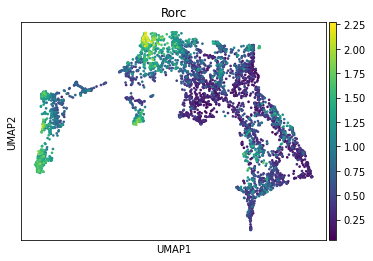

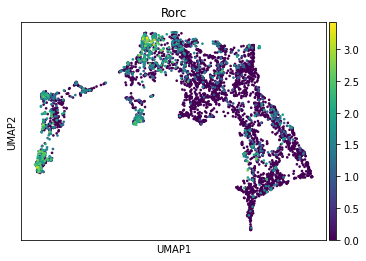

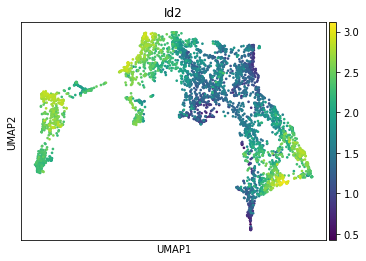

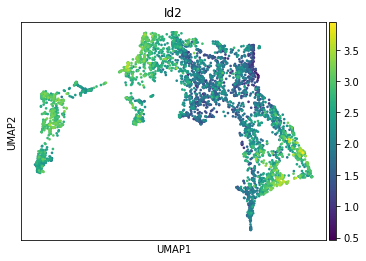

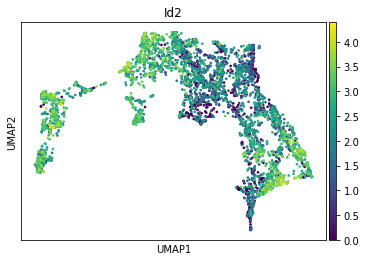

In [24]:
sc.pl.umap(adata, color="Abcb1a", layer='normalized_magic')
sc.pl.umap(adata, color="Abcb1a", layer='normalized_dca')
sc.pl.umap(adata, color="Abcb1a", layer='normalized')


sc.pl.umap(adata, color="Rorc", layer='normalized_magic')
sc.pl.umap(adata, color="Rorc", layer='normalized_dca')
sc.pl.umap(adata, color="Rorc", layer='normalized')


sc.pl.umap(adata, color="Id2", layer='normalized_magic')
sc.pl.umap(adata, color="Id2", layer='normalized_dca')
sc.pl.umap(adata, color="Id2", layer='normalized')


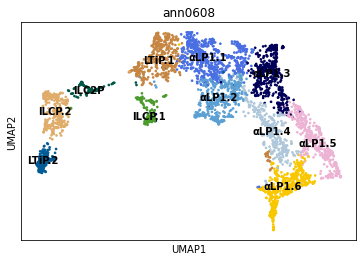

In [28]:
sc.pl.umap(adata,color="ann0608", legend_loc='on data')

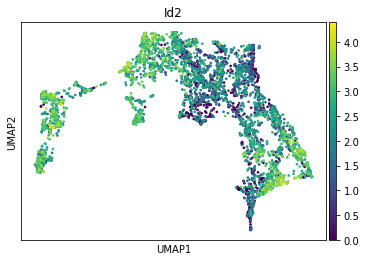

In [21]:
import scanpy as sc
sc.pl.umap(adata, color='Id2')

In [22]:
adata.write_h5ad("200608-FL-totalclustered-211006clcean.h5ad")

# construct a velocyto loom

In [27]:
# load loom file
filename="/home/csj/mywork/ilc/210618-velo/velocyto_looms/FLaLP.loom"
ldata = scv.read(filename, cache=True)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [41]:
# rename barcodes
ldata.obs_names=[ss.split(':')[1].split('x')[0] for ss in ldata.obs_names.tolist()]
# reorder loom cells as in adata
ldata=ldata[adata.obs_names].copy()


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [43]:
ldata.var_names_make_unique()
ldata.obs_names_make_unique()
ldata= ldata.copy()

In [44]:
# label transfer
ldata.obsm["X_umap"]=adata.obsm["X_umap"]
ldata.obsm["X_pca"] =adata.obsm["X_pca"]
ldata.obs=ldata.obs.drop(["_X","_Y"],axis=1)
ldata.obs['ann0608']= adata.obs["ann0608"]
ldata.obs['phase']=adata.obs['phase']
ldata.obs.Clusters=ldata.obs.Clusters.astype("category")
ldata.uns["ann0608_colors"]=adata.uns["ann0608_colors"]


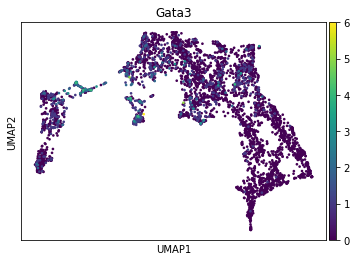

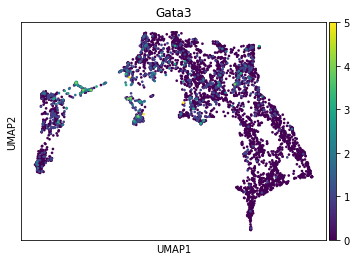

In [45]:
sc.pl.umap(adata, color='Gata3',layer='counts')
sc.pl.umap(ldata, color='Gata3',layer='matrix')

In [46]:
ldata.write("220516-FL.velo.h5ad")

In [47]:
adata.write_h5ad("220516-FL.h5ad")

# run alra imputation (in R kernel)

In [37]:
# solution from https://theislab.github.io/scanpy-in-R
sc <- import("scanpy")
library(reticulate)
adata <- sc$read_h5ad("/home/csj/mywork/ilc/220409-preprocessed_data/220516-FL.h5ad")
adata

AnnData object with n_obs × n_vars = 4284 × 13730
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'pred.immgen.finepruned', 'pred.immgen.mainpruned', 'Phase', 'S_score', 'G2M_score', 'phase', 'ann0608'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ann0608_colors', 'neighbors', 'pca', 'phase_colors', 'pred.immgen.mainpruned_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'counts_dca', 'normalized', 'normalized_dca', 'normalized_magic', 'scaled', 'scaled_dca'
    obsp: 'connectivities', 'distances'

In [38]:
exprs <- t(adata$layers[['normalized']])
colnames(exprs) <- adata$obs_names$to_list()
rownames(exprs) <- adata$var_names$to_list()

# Create the Seurat object
seurat <- CreateSeuratObject(exprs)
# Set the expression assay
seurat <- SetAssayData(seurat, "data", exprs)
# Add observation metadata
seurat <- AddMetaData(seurat, adata$obs)
# Add embedding
embedding <- adata$obsm["X_umap"]
rownames(embedding) <- adata$obs_names$to_list()
colnames(embedding) <- c("umap_1", "umap_2")
seurat[["umap"]] <- CreateDimReducObject(embedding, key = "umap_")


Warning message:
“No assay specified, setting assay as RNA by default.”


In [39]:
seurat <- ScaleData(seurat, features = rownames(seurat))
seurat <- FindVariableFeatures(seurat,selection.method = 'vst',nfeatures = 2000)
seurat <- RunPCA(seurat, npcs = 50, features = VariableFeatures(seurat),verbose = F)


Centering and scaling data matrix



In [40]:
seurat <- RunALRA(seurat)

Rank k = 25

Identifying non-zero values

Computing Randomized SVD

Find the 0.001000 quantile of each gene

Thresholding by the most negative value of each gene

Scaling all except for 0 columns

0.00% of the values became negative in the scaling process and were set to zero

The matrix went from 13.06% nonzero to 53.85% nonzero

Setting default assay as alra



In [41]:
seurat-> fl

In [42]:
mat.imputed <- t(as.matrix(fl@assays$alra@data))

In [45]:
write.table(mat.imputed, file='expr_mat_fl_alra.tsv', sep='\t')

In [ ]:
# FL

# solution from https://theislab.github.io/scanpy-in-R
sc <- import("scanpy")
library(reticulate)
adata <- sc$read_h5ad("/home/csj/mywork/ilc/220409-preprocessed_data/220516-FL.h5ad")
adata

exprs <- t(adata$layers[['normalized']])
colnames(exprs) <- adata$obs_names$to_list()
rownames(exprs) <- adata$var_names$to_list()

# Create the Seurat object
seurat <- CreateSeuratObject(exprs)
# Set the expression assay
seurat <- SetAssayData(seurat, "data", exprs)
# Add observation metadata
seurat <- AddMetaData(seurat, adata$obs)
# Add embedding
embedding <- adata$obsm["X_umap"]
rownames(embedding) <- adata$obs_names$to_list()
colnames(embedding) <- c("umap_1", "umap_2")
seurat[["umap"]] <- CreateDimReducObject(embedding, key = "umap_")


seurat <- ScaleData(seurat, features = rownames(seurat))
seurat <- FindVariableFeatures(seurat,selection.method = 'vst',nfeatures = 2000)
seurat <- RunPCA(seurat, npcs = 50, features = VariableFeatures(seurat),verbose = F)


seurat <- RunALRA(seurat)

seurat-> fl

mat.imputed <- t(as.matrix(fl@assays$alra@data))

write.table(mat.imputed, file='expr_mat_fl_alra.tsv', sep='\t')

In [6]:
mat_alra= pd.read_csv('./expr_mat_fl_alra.tsv',sep='\t')

In [3]:
adata= sc.read_h5ad('./220516-FL.h5ad')

In [19]:
adata.layers['normalized_alra'] = copy.copy(mat_alra.to_numpy().copy())

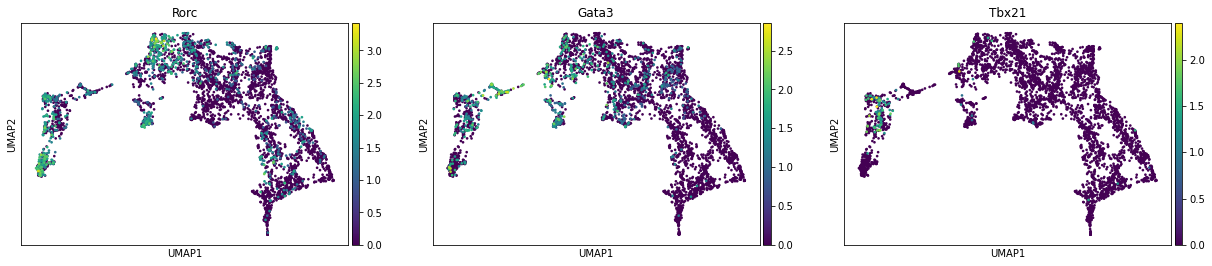

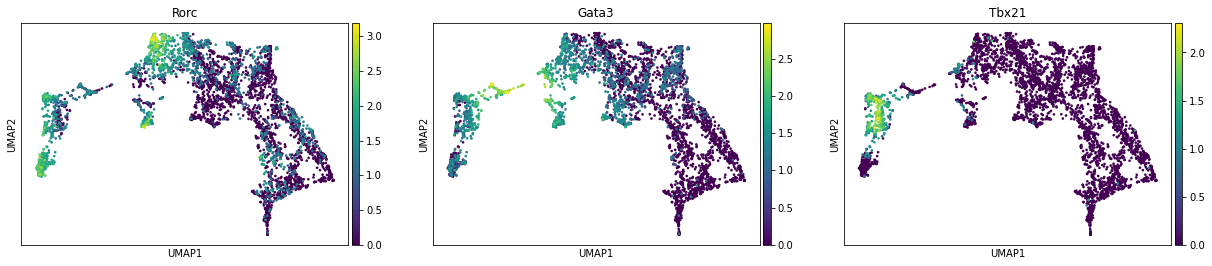

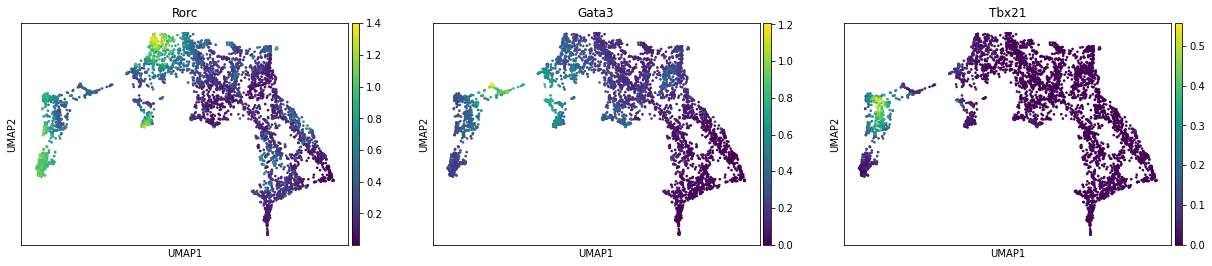

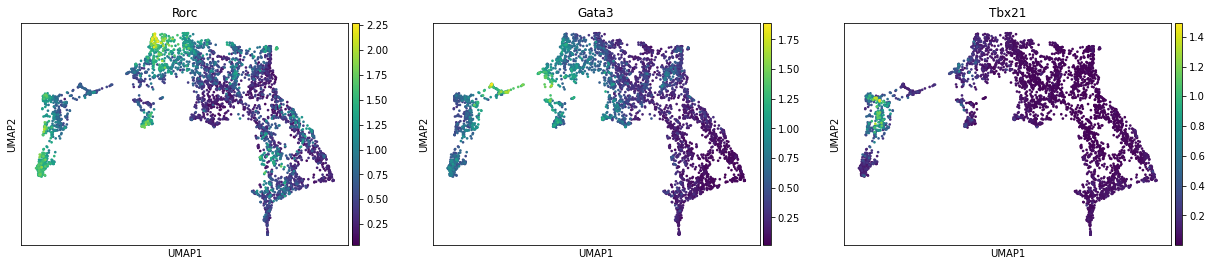

In [25]:
sc.pl.umap(adata, color=['Rorc','Gata3','Tbx21'])
sc.pl.umap(adata, color=['Rorc','Gata3','Tbx21'], layer='normalized_alra')
sc.pl.umap(adata, color=['Rorc','Gata3','Tbx21'], layer='normalized_magic')
sc.pl.umap(adata, color=['Rorc','Gata3','Tbx21'], layer='normalized_dca')

In [26]:
adata.write_h5ad("220516-FL.h5ad")